# Tout ce qu'il faut  savoir sur la matrice de confusion, courbe ROC et AUC pour l'apprentissage machine



## A - Matrice de confusion - Pas si confuse !

Vous √™tes-vous d√©j√† retrouv√© dans une situation o√π vous vous attendiez √† ce que votre mod√®le d'apprentissage machine soit tr√®s performant, mais o√π il s'est av√©r√© peu pr√©cis ? Vous avez fait tout le travail n√©cessaire - alors o√π le mod√®le de classification s'est-il tromp√© ? Comment pouvez-vous corriger cela ?

Il existe de nombreuses fa√ßons (les fameuses m√©triques) d'√©valuer les performances de votre mod√®le de classification, mais aucune n'a r√©sist√© √† l'√©preuve du temps comme la matrice de confusion. Elle nous aide √† √©valuer les performances de notre mod√®le, √† d√©terminer o√π il a mal fonctionn√© et nous offre des conseils pour corriger notre mod√®le ou ses hyperparama√®tres. 


Dans cet article, nous allons voir comment une matrice de confusion donne une vue globale des performances d'un mod√®le. Et contrairement √† son nom, vous r√©aliserez qu'une matrice de confusion est un concept assez simple mais puissant. Alors, d√©voilons le myst√®re qui entoure la matrice de confusion !

### Voici ce que nous allons d√©couvrir dans cette premi√®re partie :

* 1. Qu'est-ce qu'une matrice de confusion ?
    * Vrai positif
    * Vrai n√©gatif
    * Faux positif - Erreur de type 1
    * Faux n√©gatif - Erreur de type 2
* 2. Pourquoi une matrice de confusion ?
* 3. Pr√©cision ou rappel
* 4. La F-Mesure ou F-Score
* 5. Matrice de confusion dans Scikit-learn
* 6. Matrice de confusion pour la classification multi-classes
 

### 1. Qu'est-ce qu'une matrice de confusion ?
Oui, qu'est-ce qu'une matrice de confusion, apr√®s tout ?

Une matrice de confusion est une matrice N x N utilis√©e pour √©valuer la performance d'un mod√®le de classification, o√π N est le nombre de classes cibles (les fameuses "targets"). La matrice compare les valeurs cibles r√©elles avec celles pr√©dites par le mod√®le d'apprentissage machine. Cela nous donne une vue d'ensemble des performances de notre mod√®le de classification et des types d'erreurs qu'il commet.

Pour un probl√®me de classification binaire, nous avons donc une matrice 2 x 2 comme indiqu√© ci-dessous avec 4 valeurs :

![image1.png](https://github.com/jmbernabotto/images/blob/master/image1.png?raw=true)

D√©chiffrons cette matrice :

* La variable cible a deux valeurs : 0 ou 1 (ou vrai/faux ou Oui/Non ou Positive/N√©gative...)
* Les lignes (Actual) repr√©sentent les valeurs r√©elles de la variable cible
* Les colonnes (Predicted) repr√©sentent les valeurs pr√©dites de la variable cible

Mais qu'est-ce que TP, FP, FN et TN ici ? C'est la partie cruciale d'une matrice de confusion. Comprenons chaque terme ci-dessous.

#### Comprendre le vrai positif, le vrai n√©gatif, le faux positif et le faux n√©gatif dans une matrice de confusion

> Vrai positif (TP comme True Positive) 
La valeur pr√©vue correspond √† la valeur r√©elle
La valeur r√©elle est 1 (ou positive) et le mod√®le pr√©voit une valeur de 1 (ou positive)

> Vrai n√©gatif (TN comme True Negative)
La valeur pr√©vue correspond √† la valeur r√©elle
La valeur r√©elle est 0 (ou n√©gative) et le mod√®le pr√©voit une valeur 0 (ou n√©gative)

> Faux positif (FP comme False Positive) - Fausse alarme
La valeur pr√©dite est fausse
La valeur r√©elle est 0 (ou negative), mais le mod√®le pr√©dit une valeur 1 (ou positive)
√âgalement connue sous le nom d'erreur de type 1

> Faux n√©gatif (FN comme False Negative)
La valeur pr√©dite est fausse
La valeur r√©elle est 1 (ou positive), mais le mod√®le pr√©dit une valeur 0 (ou n√©gative)
√âgalement connue sous le nom d'erreur de type 2

>Il est √† noter que la terminologie anglaise est trompeuse. P√©dagogiquement on devrait plut√¥t parler de positif faux et de n√©gatif faux, cela √©claire mieux ces indicateurs. 

Donnons un exemple. Supposons que nous ayons un ensemble de donn√©es de classification avec 165 points de donn√©es. Nous y pla√ßons un classificateur et obtenons la matrice de confusion ci-dessous :

![image2.png](https://github.com/jmbernabotto/images/blob/master/image2.png?raw=true)

Les diff√©rentes valeurs de la matrice de confusion seraient les suivantes :

* Vrai Positif (TP) = 100 ; ce qui signifie que 100 points de donn√©es de classe positive ont √©t√© correctement class√©s par le mod√®le
* Vrai n√©gatif (TN) = 50 ; ce qui signifie que 50 points de donn√©es de classe n√©gative ont √©t√© correctement class√©s par le mod√®le
* Faux positif (FP) = 10 ; ce qui signifie que 10 points de donn√©es de la classe n√©gative ont √©t√© incorrectement class√©s comme appartenant √† la classe positive par le mod√®le
* Faux n√©gatif (FN) = 5 ; ce qui signifie que 5 points de donn√©es de classe positive ont √©t√© incorrectement class√©s comme appartenant √† la classe n√©gative par le mod√®le

Cela s'est av√©r√© √™tre un classificateur assez correct pour notre ensemble de donn√©es compte tenu du nombre relativement plus important de valeurs positives et n√©gatives r√©elles.


### 2. Pourquoi avons-nous besoin d'une matrice de confusion ?
Avant de r√©pondre √† cette question, r√©fl√©chissons √† un hypoth√©tique probl√®me de classification.

Supposons que vous vouliez pr√©dire combien de personnes sont infect√©es par un virus contagieux avant qu'elles ne pr√©sentent les sympt√¥mes, et les isoler de la population saine (√ßa vous dit quelque chose ? üò∑). Les deux valeurs de notre variable cible seraient Malade et Non Malade.

Maintenant, vous devez vous demander pourquoi nous avons besoin d'une matrice de confusion alors que nous avons un une m√©trique tr√®s r√©pandue qui est l'exactitude. Voyons o√π celle-ci s'arr√™te.

Notre ensemble de donn√©es est un exemple d'un ensemble de donn√©es d√©s√©quilibr√©. Il y a 960 points de donn√©es pour la classe n√©gative et 40 points de donn√©es pour la classe positive. Voici comment nous allons calculer l'exactitude (attention accuracy en anglais c'est exactitude et non pas pr√©cision) :

$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$



Voyons comment notre mod√®le a fonctionn√© :

![../image3.png](https://github.com/jmbernabotto/images/blob/master/image3.png?raw=true)

Les valeurs totales des r√©sultats sont :

TP = 30, TN = 930, FP = 30, FN = 10

Ainsi, la pr√©cision de notre mod√®le s'av√®re √™tre :

$$Accuracy=\frac{30+930}{30+30+930+10}=0.96$$

96% ! Pas mal non ?

Mais cela donne une mauvaise id√©e du r√©sultat. 

Notre mod√®le dit : "Je peux pr√©dire les personnes malades 96% du temps". Mais il fait le contraire. Il pr√©dit les personnes qui ne tomberont pas malades avec 96% de pr√©cision alors que les malades propagent le virus !

Pensez-vous que ce soit une mesure correcte pour notre mod√®le √©tant donn√© la gravit√© du probl√®me ? Ne devrions-nous pas mesurer le nombre de cas positifs que nous pouvons pr√©dire correctement pour arr√™ter la propagation du virus contagieux ? Ou peut-√™tre, parmi les cas correctement pr√©dits, combien de cas positifs pour v√©rifier la fiabilit√© de notre mod√®le ?

C'est l√† que nous rencontrons le double concept de **Pr√©cision** et de **Rappel**.

### 3. Pr√©cision ou rappel
>La pr√©cision nous indique combien de cas correctement pr√©vus se sont av√©r√©s positifs.

Voici comment calculer la Pr√©cision :
$$Precision = \frac{TP}{TP+FP}$$

Cela permet de d√©terminer si notre mod√®le est fiable ou non.

> Le rappel nous indique combien de cas positifs r√©els nous avons pu pr√©voir correctement avec notre mod√®le.

Et voici comment nous pouvons calculer le Rappel :

$$Rappel = \frac{TP}{TP+FN}$$

Exemple : reprenons l'exemple ci-dessus. 

Dans le code ci-dessous, j'ai recr√©e articiellement les donn√©es pour repr√©senter la matrice de confusion.

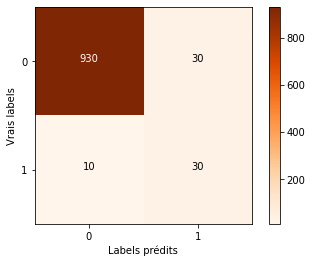

Valeurs de TN, FP, FN, TP : 
 930 30 10 30
Rapport de Classification  : 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       960
         1.0       0.50      0.75      0.60        40

    accuracy                           0.96      1000
   macro avg       0.74      0.86      0.79      1000
weighted avg       0.97      0.96      0.96      1000



In [58]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

# actual values
actual=np.concatenate((np.zeros(960),np.ones(40)))


# predicted values
predicted=np.concatenate((np.zeros(930),np.ones(30),np.zeros(10),np.ones(30)))

# confusion matrix
cnf_matrix = confusion_matrix(actual,predicted)
#print('Matrice de confusion : \n',cnf_matrix)

classes = range(0,2)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Oranges')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels pr√©dits')
plt.show()

# outcome values order in sklearn
tn, fp, fn ,tp = confusion_matrix(actual,predicted).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted)
print('Rapport de Classification  : \n',matrix)

Nous pouvons facilement calculer la Pr√©cision et le Rappel pour notre mod√®le en introduisant les valeurs dans les questions ci-dessus :


$$Precision = \frac{30}{30+30}=0.5$$

$$Rappel = \frac{30}{30+10}=0.75$$

50 % des cas correctement pr√©vus se sont r√©v√©l√©s positifs. Alors que 75 % des cas positifs ont √©t√© pr√©dits avec succ√®s par notre mod√®le. Vous remarquez d'ailleurs que l'on retrouve ces valeurs de la Pr√©cision et du Rappel dans le "rapport de classification" dont nous parlerons un peu plus bas et que ces valeurs sont donn√©es ici pour le cas dit positif, c'est √† dire 1. On voit bien que si l'on parle de 0 c'est diff√©rent. Mais ici, comme on l'a dit, on pr√©f√®re  s'int√©resser au cas 1.

>La pr√©cision est une mesure utile dans les cas o√π les faux positifs sont plus pr√©occupants que les faux n√©gatifs.

La pr√©cision est importante dans les syst√®mes de recommandation de musique ou de vid√©o, les sites de commerce √©lectronique, etc. Des r√©sultats erron√©s peuvent entra√Æner une perte de client√®le et nuire √† l'entreprise.

>Le rappel est une mesure utile dans les cas o√π les faux n√©gatifs l'emportent sur les faux positifs.

Le rappel est important dans les cas m√©dicaux o√π il importe peu que nous d√©clenchions une fausse alerte (erreur de type 1), mais o√π les cas positifs r√©els ne doivent pas passer inaper√ßus !

Dans notre exemple, le rappel serait une meilleure mesure parce que nous ne voulons pas qu'une personne infect√©e puisse se m√©langer √† la population saine, propageant ainsi le virus contagieux. Vous pouvez maintenant comprendre pourquoi la pr√©cision √©tait une mauvaise mesure pour notre mod√®le.

Mais il y aura des cas o√π il n'y aura pas de distinction claire entre la pr√©cision et le rappel. Que devrions-nous faire dans ces cas-l√† ? Nous les combinons !

### 4. La F-mesure ou F-Score
En pratique, lorsque nous essayons d'augmenter la pr√©cision de notre mod√®le, le rappel diminue, et vice-versa. La F-Mesure saisit les deux tendances en une seule valeur :

$$F{mesure}=\frac{2}{\frac{1}{Precision}+\frac{1}{Rappel}}$$


Le F-Mesure est une moyenne harmonique de la pr√©cision et du rappel, et elle donne donc une id√©e combin√©e de ces deux mesures. Elle est maximale lorsque la Pr√©cision est √©gale au Rappel.

Mais il y a un hic ici. L'interpr√©tabilit√© de la F-Mesure est m√©diocre. Cela signifie que nous ne savons pas ce que notre classificateur maximise - la pr√©cision ou le rappel ? Nous l'utilisons donc en combinaison avec d'autres m√©triques, ce qui nous donne une image compl√®te du r√©sultat.

Dans notre exemple pr√©c√©dent on a donc : 

$$F{mesure}=\frac{2}{\frac{1}{0.5}+\frac{1}{0.75}}=0.6$$


 

### 5.  Matrice de confusion en utilisant Scikit-Learn en Python
Vous connaissez la th√©orie, maintenant, mettons la en pratique. Codons une matrice de confusion avec la biblioth√®que Scikit-learn en Python.

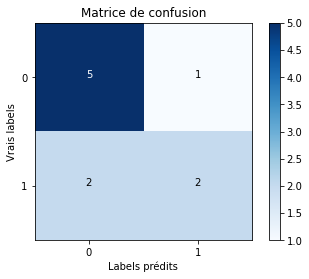

Valeurs de TN, FP, FN, TP : 
 5 1 2 2
Rapport de Classification  : 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [59]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

# confusion matrix
cnf_matrix = confusion_matrix(actual,predicted)
#print('Matrice de confusion : \n',cnf_matrix)

classes = range(0,2)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels pr√©dits')
plt.show()

# outcome values order in sklearn
tn, fp, fn ,tp = confusion_matrix(actual,predicted).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted)
print('Rapport de Classification  : \n',matrix)

Sklearn a deux grandes fonctions : confusion_matrix() et classification_report().

* La fonction confusion_matrix() de Sklearn produit les r√©sultats dans l'ordre suivant : TN, FP, FN, TP. Faites donc attention lorsque vous interpr√©tez le r√©sultat
* Sklearn classification_report() fournit des informations sur la pr√©cision, le rappel et la F-Mesure pour chaque classe de cible. En plus de cela, il poss√®de √©galement quelques valeurs suppl√©mentaires :  macro avg et avg pond√©r√©e

La macro avg est la moyenne de la pr√©cision/du rappel/du F1-score. Et weighted avg est la moyenne pond√©r√©e. 


### 6. Matrice de confusion pour la classification multi-classes

Comment fonctionnerait une matrice de confusion pour un probl√®me de classification multi-classes ? 

Dessinons une matrice de confusion pour un probl√®me de classification multiclasse o√π nous devons pr√©dire si on a affaire √† une image de chien, de lapin ou de chat:

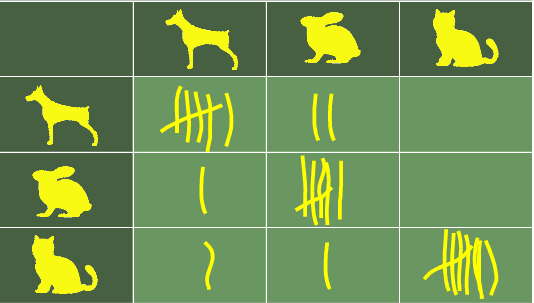


#### Exercice : Essayez de reconstituer la matrice de confusion...(c'est une matrice 3x3)



#### Et soudain...
>...La matrice de confusion n'est plus aussi confuse ! Ce notebook nous donne une base solide sur la fa√ßon d'interpr√©ter et d'utiliser une matrice de confusion pour les algorithmes de classification dans l'apprentissage machine.

## B - Comment utiliser les courbes ROC et les courbes de pr√©cision-rappel pour la classification en python


Il peut √™tre plus souple de pr√©dire les probabilit√©s d'une observation appartenant √† chaque classe dans un probl√®me de classification plut√¥t que de pr√©dire directement les classes.

Cette flexibilit√© vient de la fa√ßon dont les probabilit√©s peuvent √™tre interpr√©t√©es en utilisant diff√©rents seuils qui permettent √† l'op√©rateur du mod√®le de faire des compromis entre les pr√©occupations relatives aux erreurs commises par le mod√®le, comme le nombre de faux positifs par rapport au nombre de faux n√©gatifs. Cela est n√©cessaire lorsque l'on utilise des mod√®les o√π le co√ªt d'une erreur est sup√©rieur au co√ªt d'autres types d'erreurs.

Deux outils de diagnostic qui aident √† l'interpr√©tation des pr√©visions probabilistes pour les probl√®mes de mod√©lisation pr√©dictive de la classification binaire (√† deux classes) sont les courbes ROC et les courbes de pr√©cision de rappel.

Dans ce tutoriel, vous d√©couvrirez les courbes ROC, les courbes de pr√©cision-rappel et quand les utiliser pour interpr√©ter la pr√©diction des probabilit√©s pour les probl√®mes de classification binaire.

Apr√®s avoir termin√© ce tutoriel, vous saurez :

<li> Les courbes ROC r√©sument le compromis entre le taux positif vrai et le taux positif faux pour un mod√®le pr√©dictif utilisant diff√©rents seuils de probabilit√©.</li>
<li>Les courbes de pr√©cision-rappel r√©sument le compromis entre le taux positif r√©el et la valeur pr√©dictive positive pour un mod√®le pr√©dictif utilisant diff√©rents seuils de probabilit√©.</li>
<li>Les courbes ROC sont appropri√©es lorsque les observations sont √©quilibr√©es entre chaque classe, tandis que les courbes de pr√©cision-rappel sont appropri√©es pour les ensembles de donn√©es d√©s√©quilibr√©s.</li>


Ce tutoriel est divis√© en 6 parties :

7. Pr√©voir les probabilit√©s
8. Que sont les courbes ROC ?
9. Courbes ROC et AUC en Python
10. Que sont les courbes de rappel de pr√©cision ?
11. Courbes de rappel de pr√©cision et AUC en python
12. Quand utiliser les courbes ROC ou les courbes de rappel de pr√©cision ?

### 7. Pr√©voir les probabilit√©s
Dans un probl√®me de classification, nous pouvons d√©cider de pr√©dire directement les valeurs de classe.

Il peut aussi √™tre plus souple de pr√©voir les probabilit√©s pour chaque classe. La raison en est de pouvoir choisir et m√™me calibrer le seuil d'interpr√©tation des probabilit√©s pr√©dites.

Par exemple, une valeur par d√©faut pourrait √™tre d'utiliser un seuil de 0,5, ce qui signifie qu'une probabilit√© dans l'intervalle [0.0, 0.49] est un r√©sultat n√©gatif (0) et une probabilit√© dans l'intervalle [0.5, 1.0] est un r√©sultat positif (1).

Ce seuil peut √™tre ajust√© afin de r√©gler le comportement du mod√®le pour un probl√®me sp√©cifique. Un exemple serait de r√©duire davantage l'un ou l'autre type d'erreur.

Lorsque l'on fait une pr√©diction pour un probl√®me de classification binaire ou √† deux classes, il y a deux types d'erreurs que l'on peut faire.

<li> Faux positif. Pr√©dire un √©v√©nement alors qu'il n'y en a pas eu. On devrait d'ailleurs dire plut√¥t "positif faux" </li>
<li> Faux n√©gatif. Ne pas pr√©dire un √©v√©nement alors qu'il y a eu un √©v√©nement. De m√™me, on devrait plut√¥t dire "n√©gatif faux" </li>

En pr√©disant des probabilit√©s et en calibrant un seuil, l'op√©rateur du mod√®le peut choisir un √©quilibre entre ces deux pr√©occupations.

Par exemple, dans un syst√®me de pr√©diction du brouillard, nous pouvons √™tre beaucoup plus pr√©occup√©s par le fait d'avoir peu de faux n√©gatifs que de faux positifs. Un faux n√©gatif signifierait qu'il n'y a pas d'avertissement concernant un jour de brouillard alors qu'en fait, il s'agit d'un jour de brouillard √©lev√©, ce qui entra√Æne des probl√®mes de sant√© dans la population qui peut ne pas prendre de pr√©cautions. Un faux positif signifie que le public prendrait des mesures de pr√©caution alors qu'il n'en a pas besoin.

Une fa√ßon courante de comparer les mod√®les qui pr√©disent les probabilit√©s de probl√®mes √† deux classes est d'utiliser une courbe ROC.

### 8. Que sont les courbes ROC ?
Un outil utile pour pr√©dire la probabilit√© d'un r√©sultat binaire est la courbe des caract√©ristiques de fonctionnement du r√©cepteur, ou courbe ROC (Receiver Operating Characteristic).

Il s'agit d'un trac√© du taux de faux positifs (axe des x) par rapport au taux de vrais positifs (axe des y) pour un certain nombre de valeurs seuils candidates diff√©rentes entre 0,0 et 1,0. En d'autres termes, elle repr√©sente le taux de fausses alarmes par rapport au taux de r√©ussite.

Le taux de vrais positifs est calcul√© comme le nombre de vrais positifs divis√© par la somme du nombre de vrais positifs et du nombre de faux n√©gatifs. Il d√©crit la capacit√© du mod√®le √† pr√©dire la classe positive lorsque le r√©sultat r√©el est positif.

> Taux de vrais positifs = vrais positifs / (vrais positifs + faux n√©gatifs)
Le v√©ritable taux positif est √©galement appel√© sensibilit√©.

> Sensibilit√© = vrais positifs / (vrais positifs + faux n√©gatifs)
Le taux de faux positifs est calcul√© comme le nombre de faux positifs divis√© par la somme du nombre de faux positifs et du nombre de vrais n√©gatifs.
Il est √©galement appel√© taux de fausses alertes car il r√©sume la fr√©quence √† laquelle une classe positive est pr√©dite alors que le r√©sultat r√©el est n√©gatif.

> Taux de faux positifs = faux positifs / (faux positifs + vrais n√©gatifs)
Le taux de faux positifs est √©galement appel√© sp√©cificit√© invers√©e, o√π la sp√©cificit√© est le nombre total de vrais n√©gatifs divis√© par la somme du nombre de vrais n√©gatifs et de faux positifs.

>Sp√©cificit√© = Vrais n√©gatifs / (Vrais n√©gatifs + Faux positifs)
O√π : Taux de faux positifs = 1 - Sp√©cificit√©

La courbe ROC est un outil utile pour plusieurs raisons :

<li> Les courbes de diff√©rents mod√®les peuvent √™tre compar√©es directement en g√©n√©ral ou pour diff√©rents seuils.</li>
<li> L'aire sous la courbe (AUC) peut √™tre utilis√©e comme un r√©sum√© de la comp√©tence du mod√®le.</li>

La forme de la courbe contient beaucoup d'informations, notamment ce qui pourrait nous int√©resser le plus pour un probl√®me, le taux de faux positifs attendus et le taux de faux n√©gatifs.

Pour que cela soit clair :

<li> Des valeurs plus petites sur l'axe des abscisses du graphique indiquent des faux positifs plus faibles et des vrais n√©gatifs plus √©lev√©s.</li>

<li> Des valeurs plus grandes sur l'axe des y indiquent des vrais positifs plus √©lev√©s et des faux n√©gatifs plus faibles.</li>

Si cela vous semble confus, souvenez-vous que lorsque nous pr√©disons un r√©sultat binaire, il s'agit d'une pr√©diction correcte (vrai positif) ou non (faux positif). Il existe une tension entre ces options, de m√™me qu'entre les vrais n√©gatifs et les faux n√©gatifs.

Un mod√®le "habile" attribuera une probabilit√© plus √©lev√©e √† une occurrence positive r√©elle choisie au hasard qu'√† une occurrence n√©gative en moyenne. C'est ce que nous voulons dire lorsque nous disons que le mod√®le est habile. En g√©n√©ral, les mod√®les habiles sont repr√©sent√©s par des courbes qui s'inclinent en haut √† gauche de la parcelle.

Un classificateur sans comp√©tence est un classificateur qui ne peut pas discriminer entre les classes et qui pr√©dirait une classe al√©atoire ou une classe constante dans tous les cas. Un mod√®le sans habilet√© est repr√©sent√© au point (0,5, 0,5). Un mod√®le sans comp√©tence √† chaque seuil est repr√©sent√© par une ligne diagonale allant du coin inf√©rieur gauche du graphique au coin sup√©rieur droit et a une AUC, une aire sous la courbe ROC, (Aire Under Curve ROC) de 0,5, c'est √† dire pas mieux que le hasard.

Un mod√®le avec une habilet√© parfaite est repr√©sent√© au point (0,1). Un mod√®le avec une habilet√© parfaite est repr√©sent√© par une ligne qui va du bas √† gauche du graphique vers le haut √† gauche, puis du haut vers le haut √† droite.

Un op√©rateur peut tracer la courbe ROC pour le mod√®le final et choisir un seuil qui donne un √©quilibre souhaitable entre les faux positifs et les faux n√©gatifs.

### 9. Courbes ROC et AUC en Python

Nous pouvons tracer une courbe ROC pour un mod√®le en Python en utilisant la fonction roc_curve() scikit-learn.
La fonction prend √† la fois les r√©sultats r√©els (0,1) de l'ensemble de tests et les probabilit√©s pr√©dites pour la classe 1. La fonction renvoie les taux de faux positifs pour chaque seuil, les taux de vrais positifs pour chaque seuil et les seuils.

L'AUC (Area Under Curve ROC)  pour le ROC peut √™tre calcul√©e √† l'aide de la fonction roc_auc_score().

Comme la fonction roc_curve(), la fonction AUC prend √† la fois les r√©sultats r√©els (0,1) de l'ensemble de tests et les probabilit√©s pr√©dites pour la classe 1. Elle renvoie un score AUC compris entre 0,0 et 1,0 pour les cat√©gories "aucune comp√©tence" et "comp√©tence parfaite" respectivement.

Un exemple complet de calcul de la courbe ROC et de la courbe ROC correspondant au hasard, pour un mod√®le de r√©gression logistique sur un petit probl√®me de test, est pr√©sent√© ci-dessous.


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


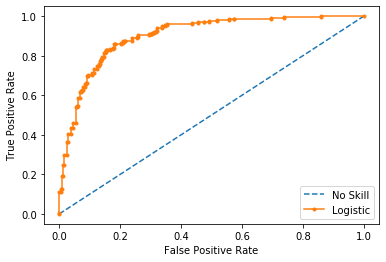

In [21]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Sans comp√©tences : ROC AUC=%.3f' % (ns_auc))
print('R√©gression Logistique : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sans comp√©tences')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='R√©gression logistique')
# axis labels
pyplot.xlabel('Taux de faux positifs')
pyplot.ylabel('Taux de vrais positifs')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Il existe aussi d'autres fa√ßons d'illustrer ces m√©triques 
* le rapport de classification (cf partie A)
* la matrice de confusion

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



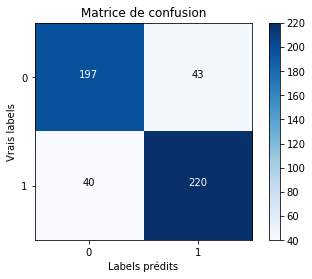

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import numpy as np
import itertools

predy = model.predict(testX)

print(classification_report(testy, predy))

cnf_matrix= confusion_matrix(testy,predy)

classes = range(0,2)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels pr√©dits')
plt.show()

### 10. Que sont les courbes de rappel de pr√©cision ?

Il existe de nombreuses fa√ßons d'√©valuer la comp√©tence d'un mod√®le de pr√©diction.

Une approche dans le domaine connexe de la recherche d'informations (trouver des documents sur la base de requ√™tes) mesure la pr√©cision et le rappel.

Ces mesures sont √©galement utiles dans l'apprentissage machine appliqu√© pour √©valuer les mod√®les de classification binaire.

La pr√©cision est un rapport entre le nombre de vrais positifs et la somme des vrais positifs et des faux positifs. Elle d√©crit la capacit√© d'un mod√®le √† pr√©dire la classe positive. La pr√©cision est appel√©e valeur pr√©dictive positive.

Pouvoir pr√©dictif positif = Pr√©cision ou on rappelle que 
$$Precision = \frac{TP}{TP + FP}$$

Le rappel est calcul√© comme le rapport du nombre de vrais positifs divis√© par la somme des vrais positifs et des faux n√©gatifs. Le rappel est identique √† la sensibilit√©.

$$Rappel = \frac{TP}{ TP + FN}$$

>ou Rappel = Sensibilit√©

L'examen de la pr√©cision et du rappel est utile dans les cas o√π il y a un d√©s√©quilibre dans les observations entre les deux classes. Plus pr√©cis√©ment, il existe de nombreux exemples d'absence d'√©v√©nement (classe 0) et seulement quelques exemples d'√©v√©nement (classe 1).

La raison en est que le grand nombre d'exemples de classe 0 signifie que nous sommes moins int√©ress√©s par la capacit√© du mod√®le √† pr√©dire correctement la classe 0, par exemple en cas de valeurs n√©gatives r√©elles √©lev√©es.

La cl√© du calcul de la pr√©cision et du rappel est que les calculs n'utilisent pas les vrais n√©gatifs. Il s'agit uniquement de la pr√©diction correcte de la classe minoritaire, la classe 1.

Une courbe de pr√©cision et de rappel est un trac√© de la pr√©cision (axe des y) et du rappel (axe des x) pour diff√©rents seuils, tout comme la courbe ROC.

Un classificateur sans comp√©tence est un classificateur qui ne peut pas faire de discrimination entre les classes et qui pr√©dirait une classe al√©atoire ou une classe constante dans tous les cas. La ligne de non-qualification change en fonction de la distribution des classes positives et n√©gatives. C'est une ligne horizontale avec la valeur du ratio des cas positifs dans l'ensemble de donn√©es. Pour un ensemble de donn√©es √©quilibr√©, cette valeur est de 0,5.

>Alors que la ligne de base est fix√©e avec la ROC, la ligne de base de [courbe de pr√©cision des appels] est d√©termin√©e par le rapport entre les cas positifs (P) et n√©gatifs (N) comme y = P / (P + N). Par exemple, nous avons y = 0,5 pour une distribution √©quilibr√©e des classes ... - Le trac√© de pr√©cision du rappel est plus informatif que le trac√© ROC lors de l'√©valuation des classificateurs binaires sur des ensembles de donn√©es d√©s√©quilibr√©s, 2015.

Un mod√®le avec une comp√©tence parfaite est repr√©sent√© par un point √† (1,1). Un mod√®le habile est repr√©sent√© par une courbe qui s'incline vers (1,1) au-dessus de la ligne plate d'aucune habilet√©.

Il existe √©galement des scores composites qui tentent de r√©sumer la pr√©cision et le rappel ; en voici deux exemples :

<li> On connait d√©j√† la F-Mesure ou F-score : qui calcule la moyenne harmonique de la pr√©cision et du rappel (moyenne harmonique parce que la pr√©cision et le rappel sont des taux).</li>
<li> Il existe donc aussi l'aire sous la courbe : AUC, r√©sume l'int√©grale ou une approximation de l'aire sous la courbe de pr√©cision et de rappel.</li>

En termes de s√©lection de mod√®le, la F-mesure r√©sume la comp√©tence du mod√®le pour un seuil de probabilit√© sp√©cifique (par exemple 0,5), tandis que l'aire sous la courbe r√©sume la comp√©tence d'un mod√®le √† travers les seuils, comme la AUC.

Cela fait du rappel de pr√©cision et du trac√© de la pr√©cision par rapport au rappel et des mesures de r√©sum√© des outils utiles pour les probl√®mes de classification binaire qui ont un d√©s√©quilibre dans les observations pour chaque classe.

### 11. Courbes de rappel de pr√©cision en python
La pr√©cision et le rappel peuvent √™tre calcul√©es dans Scikit-learn.

La pr√©cision et le rappel peuvent √™tre calcul√©s pour les seuils √† l'aide de la fonction precision_recall_curve() qui prend les valeurs de sortie r√©elles et les probabilit√©s pour la classe positive comme sortie et renvoie les valeurs de pr√©cision, de rappel et de seuil.

La F-mesure peut √™tre calcul√©e en appelant la fonction f1_score() qui prend en argument les valeurs de classe r√©elles et les valeurs de classe pr√©dites.

L'aire sous la courbe pr√©cision-rappel peut √™tre approch√©e en appelant la fonction auc() et en lui passant les valeurs de rappel (x) et de pr√©cision (y) calcul√©es pour chaque seuil.

Lorsque l'on trace la pr√©cision et le rappel pour chaque seuil sous forme de courbe, il est important que le rappel soit fourni sous forme d'axe des x et la pr√©cision sous forme d'axe des y.

L'exemple complet de calcul des courbes de pr√©cision et de rappel pour un mod√®le de r√©gression logistique est pr√©sent√© ci-dessous.

Logistic: f1=0.841 auc=0.898


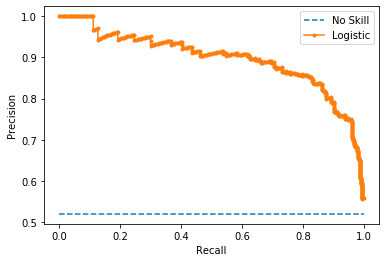

In [3]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sans comp√©tences')
pyplot.plot(lr_recall, lr_precision, marker='.', label='R√©gression Logistique')
# axis labels
pyplot.xlabel('Rappell')
pyplot.ylabel('Pr√©cision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ci-dessus, le trac√© de la courbe pr√©cision-rappel est cr√©√©, montrant la pr√©cision/le rappel pour chaque seuil pour un mod√®le de r√©gression logistique (orange) par rapport √† un mod√®le sans comp√©tence (bleu).

### 12. Quand utiliser les courbes ROC ou les courbes de rappel de pr√©cision ?

En r√®gle g√©n√©rale, l'utilisation des courbes ROC et des courbes de pr√©cision-rappel est la suivante :

<li> Les courbes ROC doivent √™tre utilis√©es lorsqu'il y a un nombre √† peu pr√®s √©gal d'observations pour chaque classe.</li>
<li>Les courbes de pr√©cision-rappel doivent √™tre utilis√©es lorsqu'il y a un d√©s√©quilibre mod√©r√© √† important entre les classes.</li>

La raison de cette recommandation est que les courbes ROC pr√©sentent une image optimiste du mod√®le sur des ensembles de donn√©es avec un d√©s√©quilibre de classe.

>Cependant, les courbes ROC peuvent pr√©senter une vision trop optimiste des performances d'un algorithme s'il y a un d√©s√©quilibre important dans la distribution des classes. [...] Les courbes de pr√©cision-rappel (PR), souvent utilis√©es dans la recherche d'informations, ont √©t√© cit√©es comme une alternative aux courbes ROC pour les t√¢ches pr√©sentant une grande asym√©trie dans la distribution des classes. - La relation entre les courbes de pr√©cision de rappel et les courbes ROC, 2006.

Certains vont plus loin et sugg√®rent que l'utilisation d'une courbe ROC avec un ensemble de donn√©es d√©s√©quilibr√©es pourrait √™tre trompeuse et conduire √† des interpr√©tations incorrectes de la comp√©tence du mod√®le.

> [...] l'interpr√©tabilit√© visuelle des courbes ROC dans le contexte d'ensembles de donn√©es d√©s√©quilibr√©s peut √™tre trompeuse en ce qui concerne les conclusions sur la fiabilit√© des performances de la classification, en raison d'une interpr√©tation intuitive mais erron√©e de la sp√©cificit√©. En revanche, les graphiques [courbe de pr√©cision-rappel] peuvent fournir √† l'observateur une pr√©diction pr√©cise des performances futures de la classification, car ils √©valuent la fraction de vrais positifs parmi les pr√©dictions positives - Le trac√© de la courbe de pr√©cision-rappel est plus informatif que le trac√© ROC lors de l'√©valuation des classificateurs binaires sur des ensembles de donn√©es d√©s√©quilibr√©s, 2015.

La principale raison de cet optimisme est l'utilisation de vrais n√©gatifs dans le taux de faux positifs de la courbe ROC et le fait d'√©viter soigneusement ce taux dans la courbe de pr√©cision-rappel.

>Si la proportion de cas positifs par rapport aux cas n√©gatifs change dans une s√©rie de tests, les courbes ROC ne changeront pas. Les mesures telles que l'exactitude, la pr√©cision, la lev√©e et les F-Mesure utilisent les valeurs des deux colonnes de la matrice de confusion. Au fur et √† mesure que la distribution d'une classe change, ces mesures changeront √©galement, m√™me si la performance du classificateur fondamental ne change pas. Les graphiques ROC sont bas√©s sur le taux de TP et le taux de FP, dans lesquels chaque dimension est un rapport en colonne strict, donc ne d√©pendent pas des distributions de classe. - Graphiques ROC : Notes et consid√©rations pratiques pour les chercheurs en extraction de donn√©es, 2003.

Nous pouvons rendre cela concret √† l'aide d'un bref exemple.

Vous trouverez ci-dessous le m√™me exemple de courbe ROC avec un probl√®me modifi√© o√π il y a un rapport d'environ 100:1 entre les observations de classe=0 et de classe=1 (plus pr√©cis√©ment Classe0=985, Classe1=15).

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


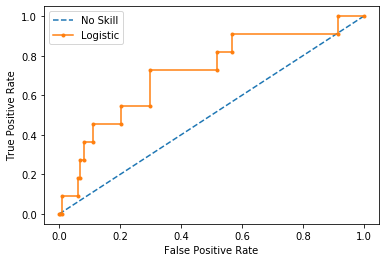

In [4]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Sans comp√©tences : ROC AUC=%.3f' % (ns_auc))
print('R√©gression Logistique : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sans comp√©tences')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='R√©gression Logistique')
# axis labels
pyplot.xlabel('Taux de faux positifs')
pyplot.ylabel('Taux de vrais positifs')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.00      0.00      0.00        11

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.96      0.98      0.97       500



/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


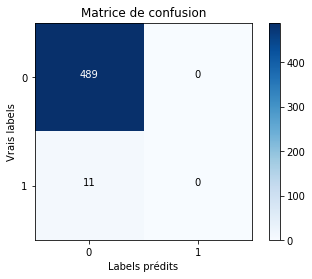

In [19]:
predy = model.predict(testX)

print(classification_report(testy, predy))

cnf_matrix= confusion_matrix(testy,predy)

classes = range(0,2)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels pr√©dits')
plt.show()

En effet, il a des comp√©tences, mais toutes ces comp√©tences sont mesur√©es comme √©tant des pr√©dictions n√©gatives r√©elles et correctes et il y a beaucoup de pr√©dictions n√©gatives √† faire.

Si vous passez en revue les pr√©dictions, vous verrez que le mod√®le pr√©dit la classe majoritaire (classe 0) dans tous les cas sur l'ensemble des tests. Le score est tr√®s trompeur.

Un trac√© de la courbe ROC confirme l'interpr√©tation de la AUC d'un mod√®le habile pour la plupart des seuils de probabilit√©.

Nous pouvons √©galement r√©p√©ter le test du m√™me mod√®le sur le m√™me ensemble de donn√©es et calculer √† la place une courbe de rappel de pr√©cision et des statistiques.

L'exemple complet est pr√©sent√© ci-dessous.

R√©gression Logistique : f1=0.000 auc=0.054


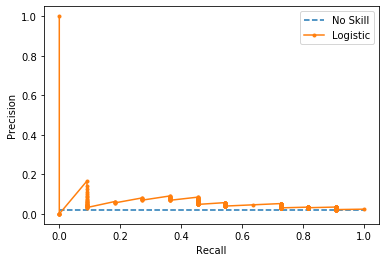

In [5]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('R√©gression Logistique :  f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sans comp√©tences')
pyplot.plot(lr_recall, lr_precision, marker='.', label='R√©gression Logistique')
# axis labels
pyplot.xlabel('Rappel')
pyplot.ylabel('Pr√©cision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

En suivant cet exemple ci-dessus, on obtient d'abord les scores du F1-Score et de l'AUC.

Nous pouvons voir que le mod√®le est p√©nalis√© pour avoir pr√©dit la classe majoritaire dans tous les cas. Les scores montrent que le mod√®le qui semblait bon selon la courbe ROC est en fait √† peine habile lorsqu'on le consid√®re en utilisant la pr√©cision et le rappel qui se concentrent sur la classe positive.

### Logistique : F-Mesure=0.000 AUC=0.054

Le trac√© de la courbe pr√©cision-rappel souligne que le mod√®le est √† peine au-dessus de la ligne d'absence de comp√©tence pour la plupart des seuils.

Cela est possible parce que le mod√®le pr√©dit des probabilit√©s et est incertain dans certains cas. Ceux-ci sont expos√©s √† travers les diff√©rents seuils √©valu√©s dans la construction de la courbe, faisant basculer certaines classes 0 √† 1, offrant une certaine pr√©cision mais un rappel tr√®s faible.

## Lectures suppl√©mentaires


### API
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
* http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
* http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

### Articles
* https://fr.wikipedia.org/wiki/Courbe_ROC
* https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel
* https://fr.wikipedia.org/wiki/Sensibilit%C3%A9_et_sp%C3%A9cificit%C3%A9
* https://classeval.wordpress.com/simulation-analysis/roc-and-precision-recall-with-imbalanced-datasets/
* https://fr.wikipedia.org/wiki/Matrice_de_confusion
* A critical investigation of recall and precision as measures of retrieval system performance, 1989.https://dl.acm.org/citation.cfm?id=65945
* The Relationship Between Precision-Recall and ROC Curves, 2006.https://dl.acm.org/citation.cfm?id=1143874
* The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015.https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/
* ROC Graphs: Notes and Practical Considerations for Data Mining Researchers, 2003.http://www.blogspot.udec.ugto.saedsayad.com/docs/ROC101.pdf



